install and imports all necessary modules

In [4]:
%pip install statsmodels.api

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement statsmodels.api (from versions: none)
ERROR: No matching distribution found for statsmodels.api


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

Exploring the datasets


In [6]:
gas = pd.read_csv("C:/Users/Muhammad Amin/Desktop/datasets/gasprices/gas_prices.csv")
gas

,Year,Australia,Canada,France,Germany,Italy,Japan,Mexico,South Korea,UK,USA
0,1990,NaN,1.87,3.63,2.65,4.59,3.16,1.00,2.05,2.82,1.16
1,1991,1.96,1.92,3.45,2.90,4.50,3.46,1.30,2.49,3.01,1.14
2,1992,1.89,1.73,3.56,3.27,4.53,3.58,1.50,2.65,3.06,1.13
3,1993,1.73,1.57,3.41,3.07,3.68,4.16,1.56,2.88,2.84,1.11
4,1994,1.84,1.45,3.59,3.52,3.70,4.36,1.48,2.87,2.99,1.11
5,1995,1.95,1.53,4.26,3.96,4.00,4.43,1.11,2.94,3.21,1.15
6,1996,2.12,1.61,4.41,3.94,4.39,3.64,1.25,3.18,3.34,1.23
7,1997,2.05,1.62,4.00,3.53,4.07,3.26,1.47,3.34,3.83,1.23
8,1998,1.63,1.38,3.87,3.34,3.84,2.82,1.49,3.04,4.06,1.06
9,1999,1.72,1.52,3.85,3.42,3.87,3.27,1.79,3.80,4.29,1.17


In [7]:
gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         19 non-null     int64  
 1   Australia    18 non-null     float64
 2   Canada       19 non-null     float64
 3   France       19 non-null     float64
 4   Germany      19 non-null     float64
 5   Italy        19 non-null     float64
 6   Japan        19 non-null     float64
 7   Mexico       19 non-null     float64
 8   South Korea  19 non-null     float64
 9   UK           19 non-null     float64
 10  USA          19 non-null     float64
dtypes: float64(10), int64(1)
memory usage: 1.8 KB


In [8]:
gas.shape

(19, 11)

In [9]:
gas.columns

Index(['Year', 'Australia', 'Canada', 'France', 'Germany', 'Italy', 'Japan',
       'Mexico', 'South Korea', 'UK', 'USA'],
      dtype='object')

In [10]:
gas.describe()

,Year,Australia,Canada,France,Germany,Italy,Japan,Mexico,South Korea,UK,USA
count,19.000000,18.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,1999.000000,2.348889,2.086842,4.407895,4.224737,4.645789,3.820526,1.781579,3.835789,4.392632,1.592105
std,5.627314,0.845931,0.786618,1.167531,1.425749,1.146610,0.696615,0.462148,1.226170,1.455170,0.663355
min,1990.000000,1.630000,1.380000,3.410000,2.650000,3.570000,2.820000,1.000000,2.050000,2.820000,1.060000
25%,1994.500000,1.780000,1.590000,3.605000,3.370000,3.805000,3.270000,1.475000,2.910000,3.135000,1.145000
50%,1999.000000,1.955000,1.730000,3.870000,3.530000,4.390000,3.640000,1.790000,3.760000,4.130000,1.230000
75%,2003.500000,2.587500,2.180000,4.700000,4.915000,4.940000,4.320000,2.210000,4.345000,5.130000,1.735000
max,2008.000000,4.450000,4.080000,7.510000,7.750000,7.630000,5.740000,2.450000,6.210000,7.420000,3.270000


In [11]:
gas.head()

,Year,Australia,Canada,France,Germany,Italy,Japan,Mexico,South Korea,UK,USA
0,1990,NaN,1.87,3.63,2.65,4.59,3.16,1.00,2.05,2.82,1.16
1,1991,1.96,1.92,3.45,2.90,4.50,3.46,1.30,2.49,3.01,1.14
2,1992,1.89,1.73,3.56,3.27,4.53,3.58,1.50,2.65,3.06,1.13
3,1993,1.73,1.57,3.41,3.07,3.68,4.16,1.56,2.88,2.84,1.11
4,1994,1.84,1.45,3.59,3.52,3.70,4.36,1.48,2.87,2.99,1.11


Imputing missing data using mean

In [12]:
imputed_df = gas.fillna(gas.mean(), inplace=False)
imputed_df.to_csv('C:\\Users\\Muhammad Amin\\Desktop\\datasets\\gasprices\\imputed_gasprices.csv')



In [13]:
imputed_df.head()

,Year,Australia,Canada,France,Germany,Italy,Japan,Mexico,South Korea,UK,USA
0,1990,2.348889,1.87,3.63,2.65,4.59,3.16,1.00,2.05,2.82,1.16
1,1991,1.960000,1.92,3.45,2.90,4.50,3.46,1.30,2.49,3.01,1.14
2,1992,1.890000,1.73,3.56,3.27,4.53,3.58,1.50,2.65,3.06,1.13
3,1993,1.730000,1.57,3.41,3.07,3.68,4.16,1.56,2.88,2.84,1.11
4,1994,1.840000,1.45,3.59,3.52,3.70,4.36,1.48,2.87,2.99,1.11


In [14]:
imputed_df.tail()

,Year,Australia,Canada,France,Germany,Italy,Japan,Mexico,South Korea,UK,USA
14,2004,2.72,2.37,4.99,5.24,5.29,3.93,2.03,4.51,5.56,1.88
15,2005,3.23,2.89,5.46,5.66,5.74,4.28,2.22,5.28,5.97,2.30
16,2006,3.54,3.26,5.88,6.03,6.10,4.47,2.31,5.92,6.36,2.59
17,2007,3.85,3.59,6.60,6.88,6.73,4.49,2.40,6.21,7.13,2.80
18,2008,4.45,4.08,7.51,7.75,7.63,5.74,2.45,5.83,7.42,3.27


Highest gas price of each country 


In [43]:
eachYear = imputed_df.drop("Year", axis=1).max()
eachYear

Australia      4.45
Canada         4.08
France         7.51
Germany        7.75
Italy          7.63
Japan          5.74
Mexico         2.45
South Korea    6.21
UK             7.42
USA            3.27
dtype: float64

Highest gas prices of each year

In [51]:
highest_gas_prices = imputed_df.drop("Year",axis=1).max(axis=1)
highest_gas_prices

0     4.59
1     4.50
2     4.53
3     4.16
4     4.36
5     4.43
6     4.41
7     4.07
8     4.06
9     4.29
10    4.58
11    4.13
12    4.16
13    4.70
14    5.56
15    5.97
16    6.36
17    7.13
18    7.75
dtype: float64

Plotting the graph

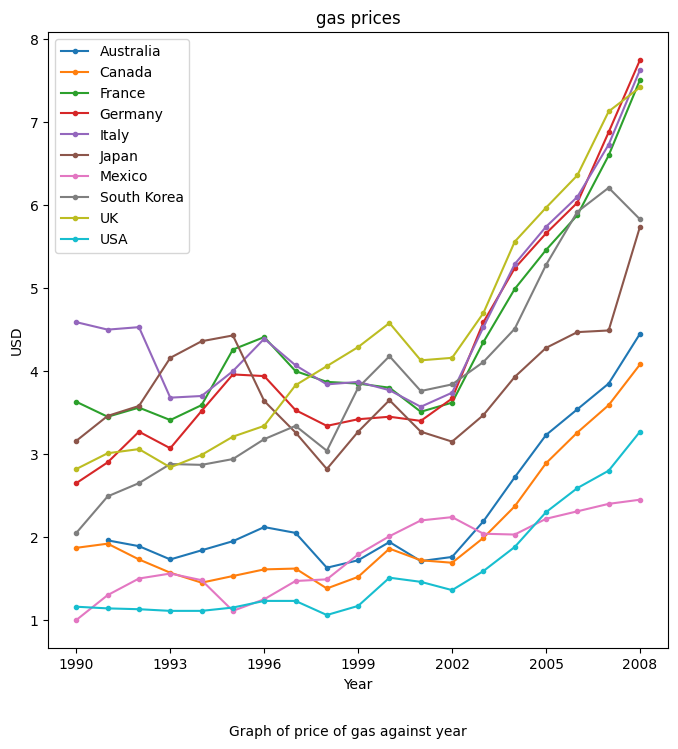

In [69]:

plt.figure(figsize=(8,8))
plt.title("gas prices")
fig = plt.gcf()
fig.text(0.5,0, 'Graph of price of gas against year', ha='center')
# plt.plot(gas.Year, gas.Australia,label=("Australia"))
# plt.plot(gas.Year, gas.USA,label=("USA"))
for country in imputed_df:
    if country != "Year":
        plt.plot(imputed_df.Year,gas[country],marker='.',label=(country))
plt.xticks(imputed_df.Year[::3])
plt.xlabel("Year")
plt.ylabel("USD")
plt.legend()
plt.show()

# Forecasting the gas prices for the next 5 years

Checking whether the data is a time-series data

From visual observation from the data and line-graph itself, the data is a time-series because it matched multiple criterias:


1) each observation occurs at specific point
2) data is recorded at regular interval. In this case, yearly.

However, in order to check whether this data is a ts data, let's do a test. 



TESTTTTSTSTSST

In [70]:
# Create a time series data set
dates = pd.date_range(start='1990', end='2008', freq='D')
ts = pd.Series(data=range(len(dates)), index=dates)

# Check the type of the index
print(type(ts.index))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


Performing ADF test to check for stationarity of each column


In [58]:
forecast = pd.read_csv("C:/Users/Muhammad Amin/Desktop/datasets/gasprices/imputed_gasprices.csv",index_col='Year', parse_dates=True)

# Perform the ADF test
for country in imputed_df:
    if country != "Year":
        result = adfuller(forecast[country].values)
        # Print the test statistic and p-value
        print(country)
        print('Test Statistic: ', result[0])
        print('p-value: ', result[1])
        # Interpret the results
        alpha = 0.05
        if result[1] > alpha:
            print('The time series is non-stationary.')
        else:
            print('The time series is stationary.')
        print("\n")





Australia
Test Statistic:  0.4662709233341859
p-value:  0.9838110599918843
The time series is non-stationary.


Canada
Test Statistic:  -2.096033448908251
p-value:  0.2461125601280103
The time series is non-stationary.


France
Test Statistic:  6.972562965571719
p-value:  1.0
The time series is non-stationary.


Germany
Test Statistic:  3.1690361354808823
p-value:  1.0
The time series is non-stationary.


Italy
Test Statistic:  3.4672553396164636
p-value:  1.0
The time series is non-stationary.


Japan
Test Statistic:  -0.09108084443597342
p-value:  0.950319701321775
The time series is non-stationary.


Mexico
Test Statistic:  -0.23521701227352607
p-value:  0.9341915750720594
The time series is non-stationary.


South Korea
Test Statistic:  2.379097641781601
p-value:  0.9990001310212778
The time series is non-stationary.


UK
Test Statistic:  3.0701435200155656
p-value:  1.0
The time series is non-stationary.


USA
Test Statistic:  -2.299398874471969
p-value:  0.17216191975844913
The t

In [78]:
forecast['diff'] = forecast['Australia'].diff()
forecast




,Unnamed: 0,Australia,Canada,France,Germany,Italy,Japan,Mexico,South Korea,UK,USA,diff
Year,,,,,,,,,,,,
1990-01-01,0,2.348889,1.87,3.63,2.65,4.59,3.16,1.00,2.05,2.82,1.16,NaN
1991-01-01,1,1.960000,1.92,3.45,2.90,4.50,3.46,1.30,2.49,3.01,1.14,-0.388889
1992-01-01,2,1.890000,1.73,3.56,3.27,4.53,3.58,1.50,2.65,3.06,1.13,-0.070000
1993-01-01,3,1.730000,1.57,3.41,3.07,3.68,4.16,1.56,2.88,2.84,1.11,-0.160000
1994-01-01,4,1.840000,1.45,3.59,3.52,3.70,4.36,1.48,2.87,2.99,1.11,0.110000
1995-01-01,5,1.950000,1.53,4.26,3.96,4.00,4.43,1.11,2.94,3.21,1.15,0.110000
1996-01-01,6,2.120000,1.61,4.41,3.94,4.39,3.64,1.25,3.18,3.34,1.23,0.170000
1997-01-01,7,2.050000,1.62,4.00,3.53,4.07,3.26,1.47,3.34,3.83,1.23,-0.070000
1998-01-01,8,1.630000,1.38,3.87,3.34,3.84,2.82,1.49,3.04,4.06,1.06,-0.420000
